In [52]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi/bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi"))))

import bpepi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [53]:
import networkx as nx
import numpy as np

In [54]:
import sys
sys.path.insert(0,'../Analysis')
sys.path.insert(0,'../bpepi')

In [55]:
from gen import simulate_one_detSIR
from bpepi.Modules import fg

## Random Regular Graph

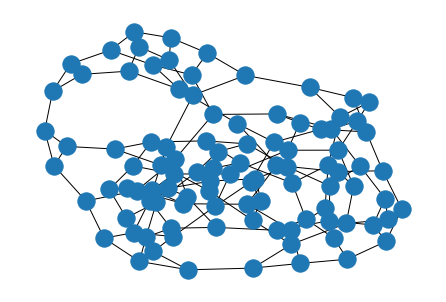

In [107]:
N=100
d=3
lam=0.8
delta=0.
G=nx.random_regular_graph(d,N)
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam
if (N<500) : nx.draw(G)

In [108]:
snn = np.array(simulate_one_detSIR(G, s_type = "delta", S = 0.0, mask = ["SI"], T_max=100))

No sources... adding a single random source


In [109]:
T = len(snn) - 1

In [110]:
from gen import generate_contacts
contacts = generate_contacts(G,T,lam)

#### Observations

In [111]:
from gen import generate_sensors_obs
num_obs = 10
obs = generate_sensors_obs(snn, o_type="n_obs", M=num_obs)

In [112]:
fg_ = fg.FactorGraph(N,T,contacts,obs,delta=1/N)

In [113]:
fg_.update(maxit=1000)

(93, 9.480639640568889e-07)

In [114]:
marg = fg_.marginals()

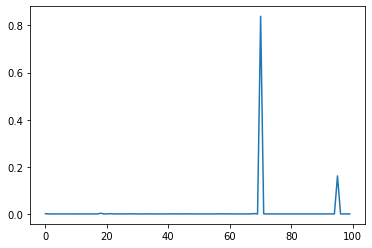

In [115]:
# Plotting the probability of each node to be infected at the starting time (probability to be the source)
plt.plot(marg[:,0])

In [116]:
if snn[:,int(np.argmax(marg[:,0]))][0]==1:
    print("Source correctly identified")
else: print("Source not identified")

Source correctly identified
